In [5]:
sum(y == 3)

2

In [6]:
# import required packages
import pandas as pd
import numpy as np

# Modelling
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image

final_features = pd.read_csv('data/final.csv')
# final_features = final_features.drop(columns=['Unnamed: 0'])

X = final_features.drop(columns=['next_day_mood', 'date'])

# round the mood values to the nearest integer
y = final_features['next_day_mood']
y = y.round()

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Oversampling the data to create balanced data using SMOTE
sampling_dict = {3: 20,
                 4: 20}
oversample = SMOTE(sampling_strategy=sampling_dict, k_neighbors=1)
X_train, y_train = oversample.fit_resample(X_train, y_train)

sampling_dict = {3: 50,
                4: 50,
                5: 150,
                6: 200,
                7: sum(y_train == 7),
                8: sum(y_train == 8),
                9: 150}
oversample = SMOTE(sampling_strategy=sampling_dict, k_neighbors=5)
X_train, y_train = oversample.fit_resample(X_train, y_train)

## FITTING THE MODEL
# Create a random forest classifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)


# Predict the labels of the test set and test accuracy
y_pred = rf.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

# print average, max and minimum depth of the trees
print(f"Average depth: {np.mean([estimator.tree_.max_depth for estimator in rf.estimators_])}")
print(f"Max depth: {np.max([estimator.tree_.max_depth for estimator in rf.estimators_])}")
print(f"Min depth: {np.min([estimator.tree_.max_depth for estimator in rf.estimators_])}")
print(f"Numer of trees: {len(rf.estimators_)}")


Accuracy: 0.5844504021447721
Average depth: 19.79
Max depth: 30
Min depth: 14
Numer of trees: 100


366
68
213
84


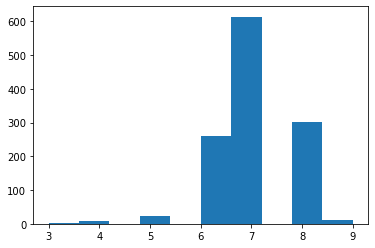

In [16]:
import matplotlib.pyplot as plt
import math

y_pred = y_pred.astype('int')

#plt.hist(y_pred)

plt.hist(y)

print(len(y_pred))
print(sum(y_pred == 6))
print(sum(y_pred == 7))
print(sum(y_pred == 8))

